In [1]:
import numpy as np
import pandas as pa 
from matplotlib import pyplot as plt 
%matplotlib inline
from qutip import *

##  1 and half cycle of engine 

In [2]:
##setting for simulation 

#swap_op = gates.swap(N=3, targets = [0,1])# swapp
'''
sx = tensor(qeye(2), sigmax()*0.5, qeye(2))
sy = tensor(qeye(2), sigmay()*0.5, qeye(2))
iy = tensor(qeye(2), qeye(2), sigmay()*0.5)
ix = tensor(qeye(2), qeye(2), sigmax()*0.5)

iy2 = tensor(sigmay()*0.5,qeye(2), qeye(2))
ix2 = tensor(sigmax()*0.5,qeye(2), qeye(2))

H = sx*ix + sy*iy
H2 = sx*ix2 + sy*iy2

flip_flop = lambda theta: (1j*H*theta).expm()    # unitary 
flip_flop2 = lambda theta: (1j*H2*theta).expm()  # unitary 
'''
'''
sx5 = tensor(qeye(2), qeye(2), qeye(2), sigmax()*0.5, qeye(2))
sy5 = tensor(qeye(2), qeye(2), qeye(2), sigmay()*0.5, qeye(2))
iy5 = tensor(qeye(2), qeye(2), qeye(2), qeye(2), sigmay()*0.5)
ix5 = tensor(qeye(2), qeye(2), qeye(2), qeye(2), sigmax()*0.5)

H5= sx5*ix5 + sy5*iy5

flip_flop_5 = lambda theta: (1j*H5*theta).expm()
'''


### rho_init = 14N bath,  electron, C90 bath, C414 flywheel

sx4 = tensor( qeye(2), sigmax()*0.5, qeye(2), qeye(2))
sy4 = tensor( qeye(2), sigmay()*0.5, qeye(2), qeye(2))
iy4 = tensor( qeye(2), qeye(2), qeye(2), sigmay()*0.5)
ix4 = tensor( qeye(2), qeye(2), qeye(2), sigmax()*0.5)

H4= sx4*ix4 + sy4*iy4

flip_flop_4 = lambda theta: (1j*H4*theta).expm()


###  rho_init = 14N bath,  electron, C90 bath, C414 flywheel

sx4_1 = tensor( qeye(2), sigmax()*0.5, qeye(2), qeye(2))
sy4_1 = tensor( qeye(2), sigmay()*0.5, qeye(2), qeye(2))
iy4_1 = tensor( qeye(2), qeye(2) , sigmay()*0.5, qeye(2))
ix4_1 = tensor( qeye(2), qeye(2) , sigmax()*0.5, qeye(2))

H4_1= sx4_1*ix4_1 + sy4_1*iy4_1

flip_flop_4_1 = lambda theta: (1j*H4_1*theta).expm()







In [3]:
def engine_sequence_1_more_cycle_c90_14N( theta_group, hotbath, coldbath,  thermal_state = False):  ### definition 
    """
    ncycles:
    thetha:
    hotbath:
    coldbath:
    resets:
    """
    ##### rho_init = 14N bath, electron, C90 bath, C414 flywheel 

   
    
    if thermal_state: 
            
            ##### rho_init = 14N bath, C90 bath, electron, C414 flywheel
            rho_init = tensor(bell_state('00')*bell_state('00').dag(),coldbath,fock_dm(2,1))
            rho1 = rho_init
    
    else: 
            ####  coherent 
            hotbath_14N = Qobj([[0.5,0.5],[0.5,0.5]])
            rho_init = tensor(hotbath_14N, hotbath, coldbath, fock_dm(2,1))     
            rho1 = rho_init
    
    
    
    rho = rho_init
    Iz_fw = [expect(sigmaz(), rho.ptrace(3))]
    #Sz_engine =[expect(sigmaz(), rho.ptrace(2))]
    swap1 = gates.swap(N=4,targets=[0,1])  ### 14N 
    #hotbath_14N = thermal_dm(2,100)
    #hotbath_14N = Qobj([[0.5,0.5],[0.5,0.5]])
    
    for theta in theta_group :  ######### 
    
    #Initial state: hotbath contact 
        
        if thermal_state: 
            
            ##### rho_init = 14N bath, electron, C90 bath,  C414 flywheel
            rho_init = tensor(bell_state('00')*bell_state('00').dag(),coldbath,fock_dm(2,1))
            rho1 = rho_init
    
        else: 
            ##### rho_init = 14N bath, electron, C90 bath, C414 flywheel
            hotbath_14N = Qobj([[0.5,0.5],[0.5,0.5]])
            rho_init = tensor(hotbath_14N, hotbath, coldbath, fock_dm(2,1))     
            rho1 = rho_init     
        
        #swap_eff = flip_flop2(np.pi)  ## effective swap operation 
       
        #ff = flip_flop(theta)   ############# variable  
        theta4_1 = np.pi*0.9
        #ff2 = flip_flop2(theta2)
        ff4 = flip_flop_4(theta)
        ff4_1 = flip_flop_4_1(theta4_1)
        
        
    #Interaction 
        rho2 = ff4 * rho1 * ff4.dag() # U rho U.dag
        
    #cold bath 
 
        rho3 = ff4_1*rho2*ff4_1.dag()
        #print (rho3.ptrace(1))
    #interaction
        rho4 = ff4 * rho3 * ff4.dag() # U rho U.dag
        
        
    #Hot bath    

        
        rho5 = swap1*rho4*swap1.dag()
        #print (rho5.ptrace(1))
    #interaction
        rho6 = ff4 * rho5 * ff4.dag() # U rho U.dag
    
    #cold bath 
        
        #rho7 = swap1*rho6*swap1.dag()
        #print (rho7.ptrace(1))
    #interaction
        #rho8 = ff4 * rho7 * ff4.dag() # U rho U.dag
        #print (rho8.ptrace(3))
    
     #hot bath 
        #rho9 = ff4_1*rho8*ff4_1.dag()
    
     # Interaction    
        #rho10 = ff4 * rho9 * ff4.dag()
    
    
         #### 13C414 : flywheel spin 
        #Sz_engine.append(expect(sigmaz(), rho8.ptrace(2)))
        Iz_fw.append(expect(sigmaz(), rho6.ptrace(3)))
    return Iz_fw
    #return Sz_engine  

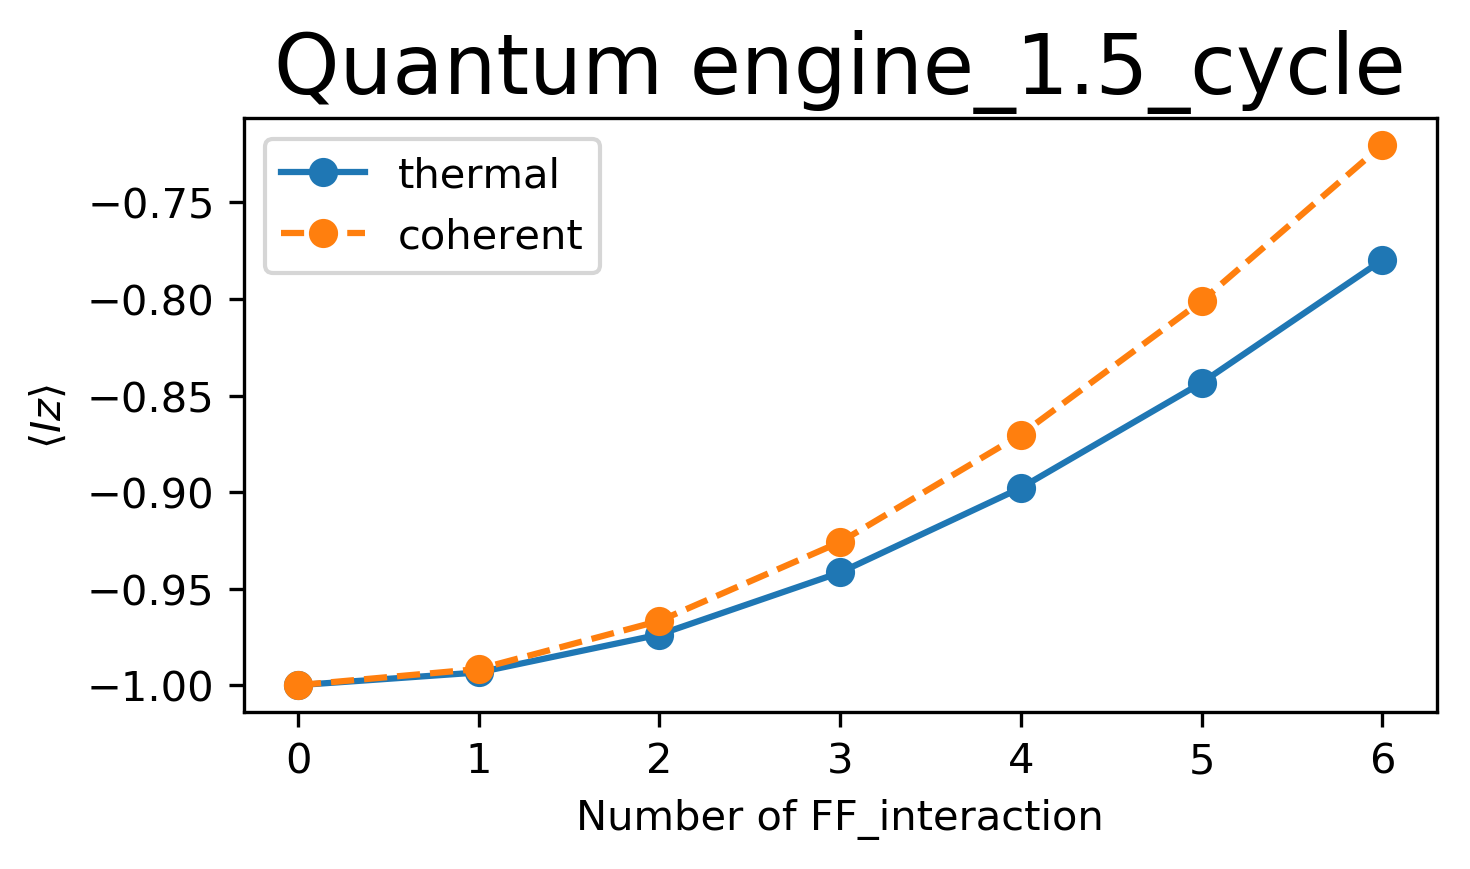

In [4]:
## Simulation on my experiment 

#theta_variable = [0.01* np.pi,0.02* np.pi,0.03* np.pi,0.04* np.pi,0.05* np.pi]
theta_variable = [(1/40.0)* np.pi,(2/40.0)* np.pi,(3/40.0)* np.pi,(4/40.0)* np.pi,(5/40.0)* np.pi,(6/40.0)* np.pi]
  ####  here intentionally  I put certain parameter for reset 

iz_thermal = engine_sequence_1_more_cycle_c90_14N(  thermal_state = True, theta_group = theta_variable, hotbath=Qobj([[0.5,0],[0,0.5]]), coldbath=fock_dm(2,0) )   ### hotbath=thermal_dm(2,100)
iz_coherent = engine_sequence_1_more_cycle_c90_14N( thermal_state = False, theta_group = theta_variable, hotbath=Qobj([[0.5,0.5],[0.5,0.5]]), coldbath=fock_dm(2,0) )


plt.figure(dpi=300, figsize = (5,3))
plt.plot(range(7),iz_thermal, 'o-', label = 'thermal')
plt.plot(range(7),iz_coherent, 'o--', label = 'coherent')
plt.title('Quantum engine_1.5_cycle',fontsize=20)
#plt.xlim(0,3)
#plt.ylim(-1.0,-0.8)
plt.xlabel('Number of FF_interaction')
plt.ylabel(r'$\langle Iz \rangle$')
plt.legend(loc = 'best')

plt.tight_layout()
plt.savefig('saved_figure_1.5cycle.pdf')
plt.savefig('saved_figure_1.5cycle.png')


##  1 cycle of engine: c90 spin bath only 

In [10]:

def engine_sequence_1_cycle_c90( theta_group, hotbath, coldbath,  thermal_state = False):  ### definition 
    """
    ncycles:
    thetha:
    hotbath:
    coldbath:
    resets:
    """
    ##### rho_init = 14N bath, electron, C90 bath, C414 flywheel 

   
    
    if thermal_state: 
            
            ##### rho_init = 14N bath, C90 bath, electron, C414 flywheel
            rho_init = tensor(bell_state('00')*bell_state('00').dag(),coldbath,fock_dm(2,1))
            rho1 = rho_init
    
    else: 
            ####  coherent 
            hotbath_14N = Qobj([[0.5,0.5],[0.5,0.5]])
            rho_init = tensor(hotbath_14N, hotbath, coldbath, fock_dm(2,1))     
            rho1 = rho_init
    
    
    
    rho = rho_init
    Iz_fw = [expect(sigmaz(), rho.ptrace(3))]
    #Sz_engine =[expect(sigmaz(), rho.ptrace(2))]
    swap1 = gates.swap(N=4,targets=[0,1])  ### 14N 
    #hotbath_14N = thermal_dm(2,100)
    #hotbath_14N = Qobj([[0.5,0.5],[0.5,0.5]])
    
    for theta in theta_group :  ######### 
    
    #Initial state: hotbath contact 
        
        if thermal_state: 
            
            ##### rho_init = 14N bath, electron, C90 bath,  C414 flywheel
            rho_init = tensor(bell_state('00')*bell_state('00').dag(),coldbath,fock_dm(2,1))
            rho1 = rho_init
    
        else: 
            ##### rho_init = 14N bath, electron, C90 bath, C414 flywheel
            hotbath_14N = Qobj([[0.5,0.5],[0.5,0.5]])
            rho_init = tensor(hotbath_14N, hotbath, coldbath, fock_dm(2,1))     
            rho1 = rho_init     
        
        #swap_eff = flip_flop2(np.pi)  ## effective swap operation 
       
        #ff = flip_flop(theta)   ############# variable  
        theta4_1 = np.pi*0.9
        #ff2 = flip_flop2(theta2)
        ff4 = flip_flop_4(theta)
        ff4_1 = flip_flop_4_1(theta4_1)
        
        
    #Interaction c414 - elec
        rho2 = ff4 * rho1 * ff4.dag() # U rho U.dag
        
    #cold bath  c90 - elec 
 
        rho3 = ff4_1*rho2*ff4_1.dag()
        #print (rho3.ptrace(1))
   
    #interaction    c414 - elec 
        rho4 = ff4 * rho3 * ff4.dag() # U rho U.dag
        
        
    #Hot bath    

        
        #rho5 = swap1*rho4*swap1.dag()
        #print (rho5.ptrace(1))
    #interaction
        #rho6 = ff4 * rho5 * ff4.dag() # U rho U.dag
    
    #cold bath 
        
        #rho7 = swap1*rho6*swap1.dag()
        #print (rho7.ptrace(1))
    #interaction
        #rho8 = ff4 * rho7 * ff4.dag() # U rho U.dag
        #print (rho8.ptrace(3))
    
     #hot bath 
        #rho9 = ff4_1*rho8*ff4_1.dag()
    
     # Interaction    
        #rho10 = ff4 * rho9 * ff4.dag()
    
    
         #### 13C414 : flywheel spin 
        #Sz_engine.append(expect(sigmaz(), rho8.ptrace(2)))
        Iz_fw.append(expect(sigmaz(), rho4.ptrace(3)))
    return Iz_fw
    #return Sz_engine  




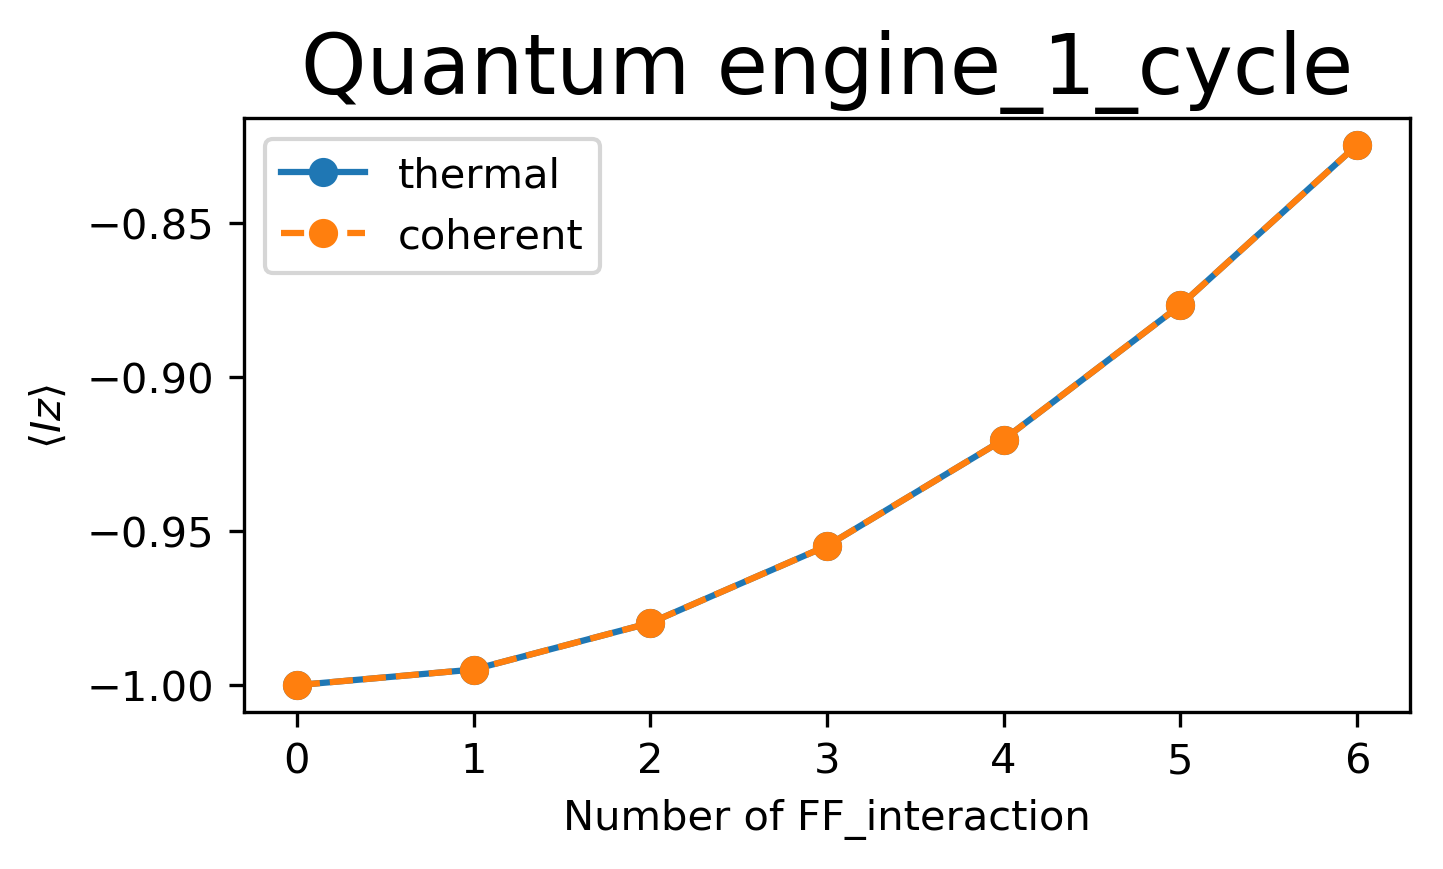

In [11]:
## Simulation on my experiment 

#theta_variable = [0.01* np.pi,0.02* np.pi,0.03* np.pi,0.04* np.pi,0.05* np.pi]
theta_variable = [(1/40.0)* np.pi,(2/40.0)* np.pi,(3/40.0)* np.pi,(4/40.0)* np.pi,(5/40.0)* np.pi,(6/40.0)* np.pi]
  ####  here intentionally  I put certain parameter for reset 

iz_thermal = engine_sequence_1_cycle_c90(  thermal_state = True, theta_group = theta_variable, hotbath=Qobj([[0.5,0],[0,0.5]]), coldbath=fock_dm(2,0) )
iz_coherent = engine_sequence_1_cycle_c90( thermal_state = False, theta_group = theta_variable, hotbath=Qobj([[0.5,0.5],[0.5,0.5]]), coldbath=fock_dm(2,0) )


plt.figure(dpi=300, figsize = (5,3))
plt.plot(range(7),iz_thermal, 'o-', label = 'thermal')
plt.plot(range(7),iz_coherent, 'o--', label = 'coherent')
plt.title('Quantum engine_1_cycle',fontsize=20)
#plt.xlim(0,3)
#plt.ylim(-1.0,-0.8)
plt.xlabel('Number of FF_interaction')
plt.ylabel(r'$\langle Iz \rangle$')
plt.legend(loc = 'best')

plt.tight_layout()
plt.savefig('saved_figure_1cycle.pdf')
plt.savefig('saved_figure_1cycle.png')


### 1 CYCLE with rotations

In [81]:


#####  Rotations
### exponential terms 
U_rot = (1j*np.pi*1.234*tensor(qeye(2),qeye(2),fock_dm(2,0),sigmaz())).expm() #14, 1390, e, 13414 
U_rot *=(1j*np.pi*2.345*tensor(qeye(2),qeye(2),fock_dm(2,1),sigmaz())).expm() #14, 1390, e, 13414
U_rot3 = rotation(N=4,op=sigmaz(),phi=0.2345*np.pi,target=1)

def engine_sequence_1_cycle_c90_rot( theta_group, hotbath, coldbath,  thermal_state = False, nuc_rotations = 0):  ### definition 
    """
    ncycles:
    thetha:
    hotbath:
    coldbath:
    resets:
    """
    ##### rho_init = 14N bath, electron, C90 bath, C414 flywheel 

   
    
    if thermal_state: 
            
            ##### rho_init = 14N bath, C90 bath, electron, C414 flywheel
            rho_init = tensor(bell_state('00')*bell_state('00').dag(),coldbath,fock_dm(2,1))
            rho1 = rho_init
    
    else: 
            ####  coherent 
            hotbath_14N = Qobj([[0.5,0.5],[0.5,0.5]])
            rho_init = tensor(hotbath_14N, hotbath, coldbath, fock_dm(2,1))     
            rho1 = rho_init
    
    
    
    rho = rho_init
    Iz_fw = [expect(sigmaz(), rho.ptrace(3))]
    #Sz_engine =[expect(sigmaz(), rho.ptrace(2))]
    swap1 = gates.swap(N=4,targets=[0,1])  ### 14N 
    #hotbath_14N = thermal_dm(2,100)
    #hotbath_14N = Qobj([[0.5,0.5],[0.5,0.5]])
    
    for theta in theta_group :  ######### 
    
    #Initial state: hotbath contact 
        
        if thermal_state: 
            
            ##### rho_init = 14N bath, electron, C90 bath,  C414 flywheel
            rho_init = tensor(bell_state('00')*bell_state('00').dag(),coldbath,fock_dm(2,1))
            rho1 = rho_init
    
        else: 
            ##### rho_init = 14N bath, electron, C90 bath, C414 flywheel
            hotbath_14N = Qobj([[0.5,0.5],[0.5,0.5]])
            rho_init = tensor(hotbath_14N, hotbath, coldbath, fock_dm(2,1))     
            rho1 = rho_init     
        
        #swap_eff = flip_flop2(np.pi)  ## effective swap operation 
       
        #ff = flip_flop(theta)   ############# variable  
        theta4_1 = np.pi*0.9
        #ff2 = flip_flop2(theta2)
        ff4 = flip_flop_4(theta)
        ff4_1 = flip_flop_4_1(theta4_1)
        
        
    #Interaction 
        rho2 = ff4 * rho1 * ff4.dag() # U rho U.dag
        
    #cold bath 
        
        rho3 = ff4_1*rho2*ff4_1.dag()
        print(rho3.ptrace(1))
    
    ## Rotate nuclear spins FW
    
        rho4 = U_rot*rho3*U_rot.dag()
    
        #print (rho3.ptrace(1))
    #interaction
        rho5 = ff4 * rho4 * ff4.dag() # U rho U.dag
        
        
    #Hot bath    

        
        #rho5 = swap1*rho4*swap1.dag()
        #print (rho5.ptrace(1))
    #interaction
        #rho6 = ff4 * rho5 * ff4.dag() # U rho U.dag
    
    #cold bath 
        
        #rho7 = swap1*rho6*swap1.dag()
        #print (rho7.ptrace(1))
    #interaction
        #rho8 = ff4 * rho7 * ff4.dag() # U rho U.dag
        #print (rho8.ptrace(3))
    
     #hot bath 
        #rho9 = ff4_1*rho8*ff4_1.dag()
    
     # Interaction    
        #rho10 = ff4 * rho9 * ff4.dag()
    
    
         #### 13C414 : flywheel spin 
        #Sz_engine.append(expect(sigmaz(), rho8.ptrace(2)))
        Iz_fw.append(expect(sigmaz(), rho5.ptrace(3)))
    return Iz_fw
    #return Sz_engine  



In [82]:
## Simulation on my experiment 

#theta_variable = [0.01* np.pi,0.02* np.pi,0.03* np.pi,0.04* np.pi,0.05* np.pi]
theta_variable = [(1/40.0)* np.pi,(2/40.0)* np.pi,(3/40.0)* np.pi,(4/40.0)* np.pi,(5/40.0)* np.pi,(6/40.0)* np.pi]
  ####  here intentionally  I put certain parameter for reset 

iz_thermal = engine_sequence_1_cycle_c90_rot(  thermal_state = True, theta_group = theta_variable, hotbath=Qobj([[0.5,0],[0,0.5]]), coldbath=fock_dm(2,0) )
iz_coherent = engine_sequence_1_cycle_c90_rot( thermal_state = False, theta_group = theta_variable, hotbath=Qobj([[0.5,0.5],[0.5,0.5]]), coldbath=fock_dm(2,0) )


# plt.figure(dpi=300, figsize = (5,3))
# plt.plot(range(7),iz_thermal, 'o-', label = 'thermal')
# plt.plot(range(7),iz_coherent, 'o--', label = 'coherent')
# plt.title('Quantum engine_1_cycle',fontsize=20)
# #plt.xlim(0,3)
# #plt.ylim(-1.0,-0.8)
# plt.xlabel('Number of FF_interaction')
# plt.ylabel(r'$\langle Iz \rangle$')
# plt.legend(loc = 'best')

# plt.tight_layout()
# plt.savefig('saved_figure_1cycle1.pdf')
# plt.savefig('saved_figure_1cycle1.png')


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.98774527  0.        ]
 [ 0.          0.01225473]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.98768881  0.        ]
 [ 0.          0.01231119]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.98759509  0.        ]
 [ 0.          0.01240491]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.9874647  0.       ]
 [ 0.         0.0125353]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.98729843  0.        ]
 [ 0.          0.01270157]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.98709731  0.        ]
 [ 0.          0.01290269]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.98774527  0.07815693]
 [ 0.07815693  0.